In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

we are trying the predict price

In [3]:
main_df=pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv")
main_df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
main_df.info

<bound method DataFrame.info of              id                                               name   host_id  \
0          2539                 Clean & quiet apt home by the park      2787   
1          2595                              Skylit Midtown Castle      2845   
2          3647                THE VILLAGE OF HARLEM....NEW YORK !      4632   
3          3831                    Cozy Entire Floor of Brownstone      4869   
4          5022   Entire Apt: Spacious Studio/Loft by central park      7192   
...         ...                                                ...       ...   
48890  36484665    Charming one bedroom - newly renovated rowhouse   8232441   
48891  36485057      Affordable room in Bushwick/East Williamsburg   6570630   
48892  36485431            Sunny Studio at Historical Neighborhood  23492952   
48893  36485609               43rd St. Time Square-cozy single bed  30985759   
48894  36487245  Trendy duplex in the very heart of Hell's Kitchen  68119814   

       

In [5]:
main_df.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

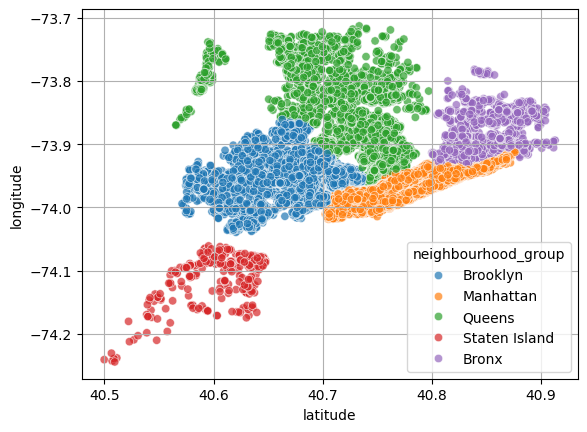

In [6]:
sns.scatterplot(data=main_df,x="latitude",y="longitude",hue='neighbourhood_group',alpha=0.7)
plt.grid()

In [7]:
main_df['last_review'].value_counts()

last_review
2019-06-23    1413
2019-07-01    1359
2019-06-30    1341
2019-06-24     875
2019-07-07     718
              ... 
2014-06-14       1
2015-01-12       1
2014-09-17       1
2015-02-12       1
2018-03-29       1
Name: count, Length: 1764, dtype: int64

In [8]:
main_df['last_review'].dtype

dtype('O')

In [9]:
main_df['has_review'] = main_df["last_review"].notna().astype(int)

In [10]:
main_df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'has_review'],
      dtype='object')

In [11]:
main_df =main_df.drop(columns=["last_review"])

In [12]:
main_df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'has_review'],
      dtype='object')

In [13]:
main_df.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
has_review                            0
dtype: int64

<Axes: xlabel='id', ylabel='price'>

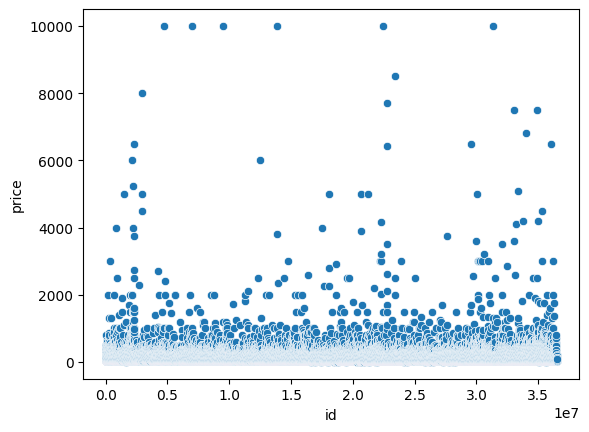

In [14]:
sns.scatterplot(data=main_df,x="id",y="price")

In [15]:
main_df['price'].nunique()

674

In [16]:
main_df['price'].value_counts().sort_values(ascending=False)

price
100     2051
150     2047
50      1534
60      1458
200     1401
        ... 
442        1
327        1
898        1
3512       1
1494       1
Name: count, Length: 674, dtype: int64

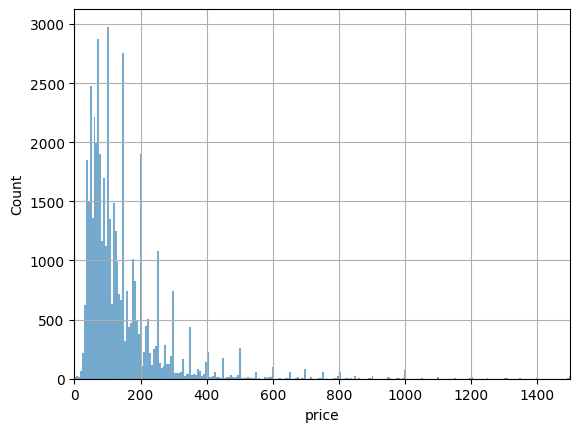

In [17]:
sns.histplot(data=main_df,x='price',alpha=0.6)
plt.xlim(0,1500)
plt.grid()

In [18]:
main_df['name'].head(4)

0     Clean & quiet apt home by the park
1                  Skylit Midtown Castle
2    THE VILLAGE OF HARLEM....NEW YORK !
3        Cozy Entire Floor of Brownstone
Name: name, dtype: object

I don't think the ad title is important for price changes.

In [19]:
main_df = main_df.drop(columns=['name'])

In [20]:
main_df['host_name'].nunique()

11452

it isnt not necesary bc we dont know the surname maybe same name diffrent person 

In [21]:
main_df=main_df.drop(columns=['host_name'])

In [22]:
main_df.columns

Index(['id', 'host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'has_review'],
      dtype='object')

In [23]:
main_df.isna().sum()

id                                    0
host_id                               0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
has_review                            0
dtype: int64

In [24]:
main_df['reviews_per_month'].dtype

dtype('float64')

In [25]:
main_df['reviews_per_month']

0        0.21
1        0.38
2         NaN
3        4.64
4        0.10
         ... 
48890     NaN
48891     NaN
48892     NaN
48893     NaN
48894     NaN
Name: reviews_per_month, Length: 48895, dtype: float64

(0.0, 20.0)

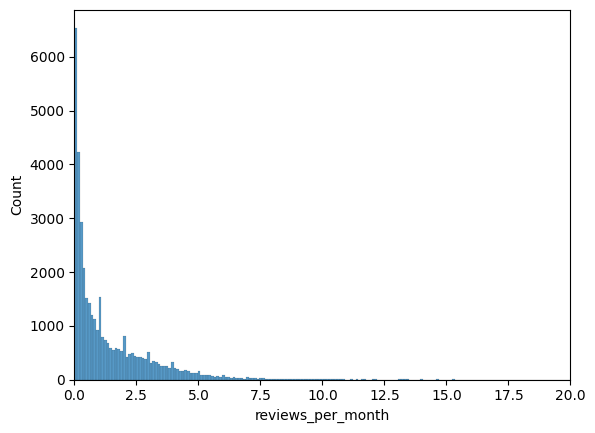

In [26]:
sns.histplot(data=main_df,x='reviews_per_month')
plt.xlim(0,20)

<Axes: xlabel='reviews_per_month', ylabel='minimum_nights'>

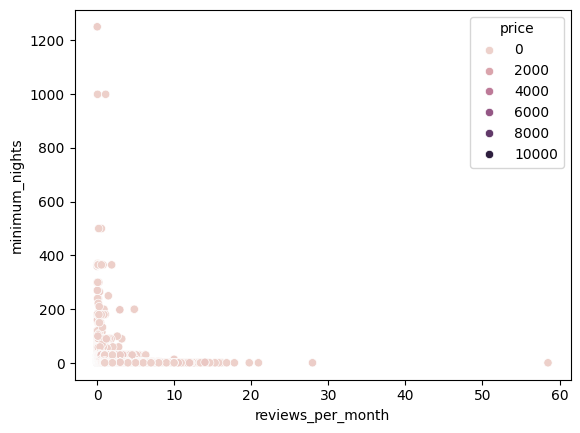

In [27]:
sns.scatterplot(main_df,x='reviews_per_month',y='minimum_nights',hue='price')

In [28]:
main_df.corr

<bound method DataFrame.corr of              id   host_id neighbourhood_group       neighbourhood  latitude  \
0          2539      2787            Brooklyn          Kensington  40.64749   
1          2595      2845           Manhattan             Midtown  40.75362   
2          3647      4632           Manhattan              Harlem  40.80902   
3          3831      4869            Brooklyn        Clinton Hill  40.68514   
4          5022      7192           Manhattan         East Harlem  40.79851   
...         ...       ...                 ...                 ...       ...   
48890  36484665   8232441            Brooklyn  Bedford-Stuyvesant  40.67853   
48891  36485057   6570630            Brooklyn            Bushwick  40.70184   
48892  36485431  23492952           Manhattan              Harlem  40.81475   
48893  36485609  30985759           Manhattan      Hell's Kitchen  40.75751   
48894  36487245  68119814           Manhattan      Hell's Kitchen  40.76404   

       longitude   

In [29]:
main_df['reviews_per_month']= main_df['reviews_per_month'].fillna(0)

In [30]:
main_df.isna().sum()

id                                0
host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
has_review                        0
dtype: int64

In [31]:
main_df.columns

Index(['id', 'host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'has_review'],
      dtype='object')

In [32]:
pd.DataFrame(main_df['minimum_nights'].value_counts().sort_values(ascending = False).reset_index())

,minimum_nights,count
0,1,12720
1,2,11696
2,3,7999
3,30,3760
4,4,3303
...,...,...
104,275,1
105,182,1
106,114,1
107,85,1


In [33]:
def short_long(x):
    if x >= 15 :
        return 1
    elif x < 15 :
        return 0

In [34]:
main_df['minimum_nights']=main_df['minimum_nights'].apply(short_long)

In [35]:
main_df["minimum_nights"].value_counts()

minimum_nights
0    42995
1     5900
Name: count, dtype: int64

In [69]:
main_df.columns

Index(['id', 'host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'price', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'has_review', 'Private room', 'Shared room'],
      dtype='object')

<Axes: xlabel='minimum_nights', ylabel='Count'>

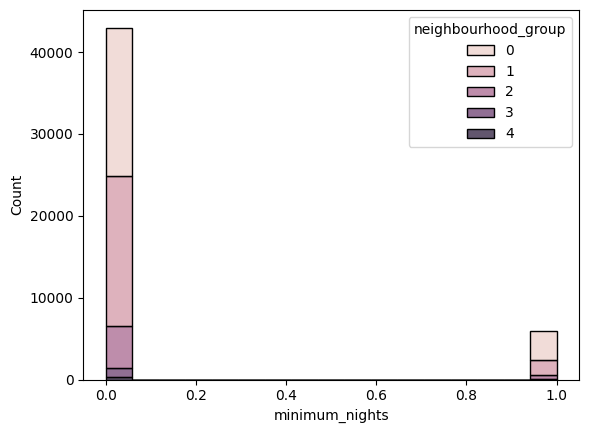

In [73]:
sns.histplot(data=main_df,x='minimum_nights',hue='neighbourhood_group',multiple='stack')

In [37]:
main_df["room_type"].value_counts()

room_type
Entire home/apt    25409
Private room       22326
Shared room         1160
Name: count, dtype: int64

pd.get_dummies(main_df["room_type"])

In [38]:
dummis=pd.get_dummies(main_df["room_type"], drop_first=True).astype(int)

In [39]:
main_df = main_df.join(dummis)

In [40]:
main_df

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,has_review,Private room,Shared room
0,2539,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,0,9,0.21,6,365,1,1,0
1,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,0,45,0.38,2,355,1,0,0
2,3647,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,0,0,0.00,1,365,0,1,0
3,3831,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,0,270,4.64,1,194,1,0,0
4,5022,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,0,9,0.10,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,8232441,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,0,0,0.00,2,9,0,1,0
48891,36485057,6570630,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,0,0,0.00,2,36,0,1,0
48892,36485431,23492952,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,0,0,0.00,1,27,0,0,0
48893,36485609,30985759,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,0,0,0.00,6,2,0,0,1


In [41]:
main_df=main_df.drop(columns=('room_type'))

In [42]:
main_df['neighbourhood'].value_counts()

neighbourhood
Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Richmondtown             1
Fort Wadsworth           1
New Dorp                 1
Rossville                1
Willowbrook              1
Name: count, Length: 221, dtype: int64

In [43]:
mean_price = main_df.groupby('neighbourhood')['price'].mean()

“I replaced the name of the neighborhood with the average price of that neighborhood.”


In [44]:
main_df['neighbourhood'] = main_df['neighbourhood'].map(mean_price)

In [45]:
main_df

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,has_review,Private room,Shared room
0,2539,2787,Brooklyn,92.885714,40.64749,-73.97237,149,0,9,0.21,6,365,1,1,0
1,2595,2845,Manhattan,282.719094,40.75362,-73.98377,225,0,45,0.38,2,355,1,0,0
2,3647,4632,Manhattan,118.974041,40.80902,-73.94190,150,0,0,0.00,1,365,0,1,0
3,3831,4869,Brooklyn,181.893357,40.68514,-73.95976,89,0,270,4.64,1,194,1,0,0
4,5022,7192,Manhattan,133.198747,40.79851,-73.94399,80,0,9,0.10,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,8232441,Brooklyn,107.678244,40.67853,-73.94995,70,0,0,0.00,2,9,0,1,0
48891,36485057,6570630,Brooklyn,84.800406,40.70184,-73.93317,40,0,0,0.00,2,36,0,1,0
48892,36485431,23492952,Manhattan,118.974041,40.81475,-73.94867,115,0,0,0.00,1,27,0,0,0
48893,36485609,30985759,Manhattan,204.794178,40.75751,-73.99112,55,0,0,0.00,6,2,0,0,1


In [46]:
main_df['neighbourhood_group'].value_counts()

neighbourhood_group
Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: count, dtype: int64

In [47]:
main_df['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [48]:
numeric_neighbourhood= {'Manhattan':0,
                        'Brooklyn': 1,
                         'Queens': 2,
                          'Bronx': 3,
                          'Staten Island':4 } 

In [49]:
main_df['neighbourhood_group'].map(numeric_neighbourhood)

0        1
1        0
2        0
3        1
4        0
        ..
48890    1
48891    1
48892    0
48893    0
48894    0
Name: neighbourhood_group, Length: 48895, dtype: int64

In [50]:
main_df['neighbourhood_group'] = main_df['neighbourhood_group'].map(numeric_neighbourhood)

In [51]:
main_df.head()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,has_review,Private room,Shared room
0,2539,2787,1,92.885714,40.64749,-73.97237,149,0,9,0.21,6,365,1,1,0
1,2595,2845,0,282.719094,40.75362,-73.98377,225,0,45,0.38,2,355,1,0,0
2,3647,4632,0,118.974041,40.80902,-73.94190,150,0,0,0.00,1,365,0,1,0
3,3831,4869,1,181.893357,40.68514,-73.95976,89,0,270,4.64,1,194,1,0,0
4,5022,7192,0,133.198747,40.79851,-73.94399,80,0,9,0.10,1,0,1,0,0


<Axes: xlabel='price', ylabel='Count'>

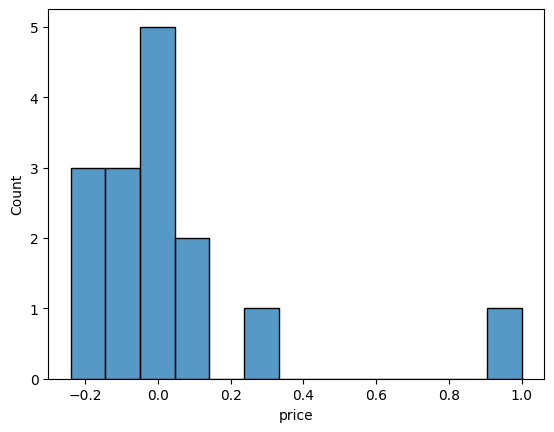

In [52]:
sns.histplot(data=main_df.corr()['price'])

<Axes: xlabel='neighbourhood_group', ylabel='price'>

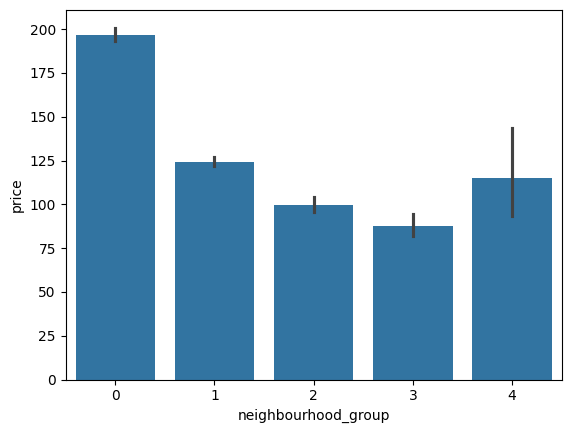

In [66]:
sns.barplot(data=main_df,x='neighbourhood_group',y='price')

ugly verry ugly

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
train_df, test_df =train_test_split(main_df)

In [56]:
train_df

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,has_review,Private room,Shared room
30408,23515323,1687425,1,144.822422,40.73075,-73.95725,80,0,0,0.00,1,0,0,1,0
35082,27814780,67913256,1,143.802806,40.71475,-73.94913,75,0,5,0.59,1,55,1,1,0
12210,9463261,30942491,0,114.783237,40.80473,-73.96528,62,1,0,0.00,1,0,0,1,0
34645,27483961,2822805,1,107.678244,40.68540,-73.94976,60,1,1,0.14,8,0,1,1,0
8061,6221877,31675601,1,144.432624,40.62672,-74.02802,65,1,56,1.14,4,208,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40991,31881336,5704932,3,69.444444,40.86566,-73.88748,65,0,6,1.18,3,77,1,1,0
48833,36450896,29741813,0,225.490591,40.70605,-74.01042,475,0,0,0.00,1,64,0,0,0
47336,35699567,268537798,2,80.897849,40.74860,-73.88469,99,0,0,0.00,1,90,0,1,0
16343,13142258,65652567,2,85.097872,40.74377,-73.90240,125,0,156,4.13,1,263,1,0,0


In [57]:
test_df

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,has_review,Private room,Shared room
21975,17681470,60244293,1,107.678244,40.68445,-73.92662,160,0,45,1.61,2,0,1,0,0
25205,20176653,143631031,1,84.800406,40.70135,-73.92402,50,0,31,1.34,1,0,1,1,0
36941,29365401,196058543,2,121.625000,40.72192,-73.83931,40,0,20,2.40,5,230,1,0,1
27953,21865416,67349249,0,282.719094,40.76427,-73.98208,450,0,0,0.00,4,229,0,0,0
19930,15969978,21660871,1,112.480179,40.67559,-73.96066,45,0,1,0.03,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47651,35845453,161467377,1,84.800406,40.69689,-73.92566,189,0,1,1.00,1,24,1,0,0
4690,3291524,15740819,1,151.374233,40.69236,-73.97254,100,1,5,0.08,2,10,1,1,0
10590,8144049,2126994,0,118.974041,40.80679,-73.94408,62,0,5,0.11,1,0,1,1,0
27563,21691896,21248,1,113.041026,40.65015,-74.01084,300,0,1,0.05,1,0,1,0,0


In [58]:
x_train= train_df.drop(columns='price')
x_test = test_df.drop(columns = 'price')

In [77]:
y_train = train_df['price']
y_test = test_df['price']

In [79]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error,r2_score

In [81]:
def model_evulation (x_matrix, y_matrix,model):
    preds=model.predict(x_matrix)
    print(f'mean_absolute_error : {mean_absolute_error(y_true=y_matrix,y_pred=preds)}')
    print(f'mean_squared_error : {mean_squared_error(y_true=y_matrix,y_pred=preds)}')
    print(f'root_mean_squared_error : {root_mean_squared_error(y_true=y_matrix,y_pred=preds)}')
    print(f'r2 score : {r2_score(y_true=y_matrix,y_pred=preds)}')

In [82]:
from sklearn.ensemble import RandomForestRegressor

In [83]:
rf_model = RandomForestRegressor()
rf_model.fit(x_train,y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsample

In [84]:
model_evulation(x_train,y_train,rf_model)

mean_absolute_error : 24.113441138774505
mean_squared_error : 6401.967010913256
root_mean_squared_error : 80.01229287374069
r2 score : 0.8819381961180703


In [85]:
model_evulation(x_test,y_test,rf_model)

mean_absolute_error : 68.4562982657068
mean_squared_error : 57398.87261047938
root_mean_squared_error : 239.58061818619507
r2 score : 0.1557852253188472


In [90]:
from sklearn.model_selection import GridSearchCV

In [114]:
hyperparameters_dict = {
    'criterion' : ['absolute_error','squared_error'],
    'min_samples_split' : [4,8],
    'min_samples_leaf' : [2,6],
    'n_estimators':[25,45]
}

In [121]:
gridsearch_model = GridSearchCV(
    estimator=rf_model,
    param_grid= hyperparameters_dict,
    scoring='r2',
    verbose=2,
    cv=3,
    n_jobs=-1
)

In [122]:
gridsearch_model.fit(x_train,y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[CV] END criterion=absolute_error, min_samples_leaf=2, min_samples_split=4, n_estimators=25; total time=  33.7s
[CV] END criterion=absolute_error, min_samples_leaf=2, min_samples_split=4, n_estimators=25; total time=  34.2s
[CV] END criterion=absolute_error, min_samples_leaf=2, min_samples_split=4, n_estimators=25; total time=  24.4s
[CV] END criterion=absolute_error, min_samples_leaf=2, min_samples_split=4, n_estimators=45; total time=  42.7s
[CV] END criterion=absolute_error, min_samples_leaf=2, min_samples_split=4, n_estimators=45; total time=  43.2s
[CV] END criterion=absolute_error, min_samples_leaf=2, min_samples_split=4, n_estimators=45; total time=  42.5s
[CV] END criterion=absolute_error, min_samples_leaf=2, min_samples_split=8, n_estimators=25; total time=  23.4s
[CV] END criterion=absolute_error, min_samples_leaf=2, min_samples_split=8, n_estimators=25; total time=  23.6s
[CV] END criterion=absolute_error, min_samples_leaf=2, min_samples_split=8, n_estimators=25; total time=

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",RandomForestRegressor()
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'criterion': ['absolute_error', 'squared_error'], 'min_samples_leaf': [2, 6], 'min_samples_split': [4, 8], 'n_estimators': [25, 45]}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'r2'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",3
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parame

In [87]:
from sklearn.ensemble import GradientBoostingRegressor


In [88]:
gb_model = GradientBoostingRegressor()


In [89]:
gb_model.fit(x_train,y_train)

,"loss loss: {'squared_error', 'absolute_error', 'huber', 'quantile'}, default='squared_error'Loss function to be optimized. 'squared_error' refers to the squarederror for regression. 'absolute_error' refers to the absolute error ofregression and is a robust loss function. 'huber' is acombination of the two. 'quantile' allows quantile regression (use`alpha` to specify the quantile).See:ref:`sphx_glr_auto_examples_ensemble_plot_gradient_boosting_quantile.py`for an example that demonstrates quantile regression for creatingprediction intervals with `loss='quantile'`.",'squared_error'
,"learning_rate learning_rate: float, default=0.1Learning rate shrinks the contribution of each tree by `learning_rate`.There is a trade-off between learning_rate and n_estimators.Values must be in the range `[0.0, inf)`.",0.1
,"n_estimators n_estimators: int, default=100The number of boosting stages to perform. Gradient boostingis fairly robust to over-fitting so a large number usuallyresults in better performance.Values must be in the range `[1, inf)`.",100
,"subsample subsample: float, default=1.0The fraction of samples to be used for fitting the individual baselearners. If smaller than 1.0 this results in Stochastic GradientBoosting. `subsample` interacts with the parameter `n_estimators`.Choosing `subsample < 1.0` leads to a reduction of varianceand an increase in bias.Values must be in the range `(0.0, 1.0]`.",1.0
,"criterion criterion: {'friedman_mse', 'squared_error'}, default='friedman_mse'The function to measure the quality of a split. Supported criteria are""friedman_mse"" for the mean squared error with improvement score byFriedman, ""squared_error"" for mean squared error. The default value of""friedman_mse"" is generally the best as it can provide a betterapproximation in some cases... versionadded:: 0.18",'friedman_mse'
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, values must be in the range `[2, inf)`.- If float, values must be in the range `(0.0, 1.0]` and `min_samples_split` will be `ceil(min_samples_split * n_samples)`... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, values must be in the range `[1, inf)`.- If float, values must be in the range `(0.0, 1.0)` and `min_samples_leaf` will be `ceil(min_samples_leaf * n_samples)`... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.Values must be in the range `[0.0, 0.5]`.",0.0
,"max_depth max_depth: int or None, default=3Maximum depth of the individual regression estimators. The maximumdepth limits the number of nodes in the tree. Tune this parameterfor best performance; the best value depends on the interactionof the input variables. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.If int, values must be in the range `[1, inf)`.",3
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.Values must be in the range `[0.0, inf)`.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft 

In [125]:
model_evulation(x_train,y_train,gridsearch_model)

mean_absolute_error : 46.69410291451356
mean_squared_error : 31112.656874658132
root_mean_squared_error : 176.387802510996
r2 score : 0.42623628208017483


In [123]:
model_evulation(x_test,y_test,gridsearch_model)

mean_absolute_error : 66.07620537290589
mean_squared_error : 54554.468671762945
root_mean_squared_error : 233.5689805427145
r2 score : 0.19762032975585087


In [126]:
gridsearch_model.best_params_

{'criterion': 'squared_error',
 'min_samples_leaf': 6,
 'min_samples_split': 4,
 'n_estimators': 45}

In [129]:
np.round(pd.DataFrame(gridsearch_model.best_estimator_.feature_importances_,gridsearch_model.feature_names_in_)*100,3).sort_values(0, ascending=False)


,0
host_id,14.336
neighbourhood,13.947
Private room,13.834
id,13.073
availability_365,10.324
latitude,9.947
longitude,9.791
calculated_host_listings_count,4.287
reviews_per_month,3.882
number_of_reviews,2.855
